<a href="https://colab.research.google.com/github/actionlion/bigdata_edu_sample/blob/main/Data_Table_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ïã§Ïäµ

In [ ]:
!pip install livelossplot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,  accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

from mlxtend.plotting import plot_decision_regions

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from livelossplot import PlotLossesKeras
from keras.utils import to_categorical

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/hongsukyi/Lectures/main/data/vds16.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     8064 non-null   object 
 1   ToVol    8064 non-null   int64  
 2   SmVol    8064 non-null   int64  
 3   MeVol    8064 non-null   int64  
 4   LaVol    8064 non-null   int64  
 5   Speed    8064 non-null   float64
 6   OccRate  8064 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 441.1+ KB


In [ ]:
df.head()

Date  ToVol  SmVol  MeVol  LaVol  Speed  OccRate
0  2017-04-02 0:00     43     34      9      0   50.3     1.90
1  2017-04-02 0:05     45     32     13      0   58.9     1.84
2  2017-04-02 0:10     46     34     12      0   50.6     1.87
3  2017-04-02 0:15     45     36      9      0   50.9     1.72
4  2017-04-02 0:20     27     13     13      1   62.2     1.12

In [ ]:
df.tail()

Date  ToVol  SmVol  MeVol  LaVol  Speed  OccRate
8059  2017-04-29 23:35     45     35     10      0   51.3     2.01
8060  2017-04-29 23:40     47     33     14      0   53.9     1.89
8061  2017-04-29 23:45     32     28      4      0   50.6     1.36
8062  2017-04-29 23:50     31     21     10      0   59.3     1.40
8063  2017-04-29 23:55     39     33      6      0   52.5     1.74

In [ ]:
df['new_Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d %H:%M")

In [ ]:
df.head(3)

Date  ToVol  SmVol  MeVol  LaVol  Speed  OccRate  \
0  2017-04-02 0:00     43     34      9      0   50.3     1.90   
1  2017-04-02 0:05     45     32     13      0   58.9     1.84   
2  2017-04-02 0:10     46     34     12      0   50.6     1.87   

             new_Date  
0 2017-04-02 00:00:00  
1 2017-04-02 00:05:00  
2 2017-04-02 00:10:00

In [ ]:
df.tail(3)

Date  ToVol  SmVol  MeVol  LaVol  Speed  OccRate  \
8061  2017-04-29 23:45     32     28      4      0   50.6     1.36   
8062  2017-04-29 23:50     31     21     10      0   59.3     1.40   
8063  2017-04-29 23:55     39     33      6      0   52.5     1.74   

                new_Date  
8061 2017-04-29 23:45:00  
8062 2017-04-29 23:50:00  
8063 2017-04-29 23:55:00

In [ ]:
df['time'] = df['new_Date'].dt.time
df['hour'] = df['new_Date'].dt.hour
df['day'] = df['new_Date'].dt.day
df['day_name'] = df['new_Date'].dt.day_name()
df['weekday'] = df['new_Date'].dt.weekday

In [ ]:
df.tail(3)

Date  ToVol  SmVol  MeVol  LaVol  Speed  OccRate  \
8061  2017-04-29 23:45     32     28      4      0   50.6     1.36   
8062  2017-04-29 23:50     31     21     10      0   59.3     1.40   
8063  2017-04-29 23:55     39     33      6      0   52.5     1.74   

                new_Date      time  hour  day  day_name  weekday  
8061 2017-04-29 23:45:00  23:45:00    23   29  Saturday        5  
8062 2017-04-29 23:50:00  23:50:00    23   29  Saturday        5  
8063 2017-04-29 23:55:00  23:55:00    23   29  Saturday        5

In [ ]:
df = df[df.weekday.isin([0,1,2,3,4])]
#5: ÌÜ†ÏöîÏùº, 6:ÏùºÏöîÏùº

In [ ]:
df.tail(3)

Date  ToVol  SmVol  MeVol  LaVol  Speed  OccRate  \
7773  2017-04-28 23:45     81     69     12      0   56.6     3.00   
7774  2017-04-28 23:50     45     32     13      0   56.5     1.69   
7775  2017-04-28 23:55     53     43     10      0   51.9     2.46   

                new_Date      time  hour  day day_name  weekday  
7773 2017-04-28 23:45:00  23:45:00    23   28   Friday        4  
7774 2017-04-28 23:50:00  23:50:00    23   28   Friday        4  
7775 2017-04-28 23:55:00  23:55:00    23   28   Friday        4

In [ ]:
print(df['weekday'].unique())
print(df['day_name'].unique())

[0 1 2 3 4]
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.tail(3)

Date  ToVol  SmVol  MeVol  LaVol  Speed  OccRate  \
5757  2017-04-28 23:45     81     69     12      0   56.6     3.00   
5758  2017-04-28 23:50     45     32     13      0   56.5     1.69   
5759  2017-04-28 23:55     53     43     10      0   51.9     2.46   

                new_Date      time  hour  day day_name  weekday  
5757 2017-04-28 23:45:00  23:45:00    23   28   Friday        4  
5758 2017-04-28 23:50:00  23:50:00    23   28   Friday        4  
5759 2017-04-28 23:55:00  23:55:00    23   28   Friday        4

In [ ]:
num_classes = 3
class_labels = ['Jam', 'Slow', 'Normal']
def Speed_score(speed) :
  if speed < 45:
    label = 'Jam'
  elif speed < 50:
    label = 'Slow'
  else :
    label = 'Normal'
  return label

df["label"] = df["Speed"].apply(lambda x:Speed_score(x))
df.tail(3)

Date  ToVol  SmVol  MeVol  LaVol  Speed  OccRate  \
5757  2017-04-28 23:45     81     69     12      0   56.6     3.00   
5758  2017-04-28 23:50     45     32     13      0   56.5     1.69   
5759  2017-04-28 23:55     53     43     10      0   51.9     2.46   

                new_Date      time  hour  day day_name  weekday   label  
5757 2017-04-28 23:45:00  23:45:00    23   28   Friday        4  Normal  
5758 2017-04-28 23:50:00  23:50:00    23   28   Friday        4  Normal  
5759 2017-04-28 23:55:00  23:55:00    23   28   Friday        4  Normal

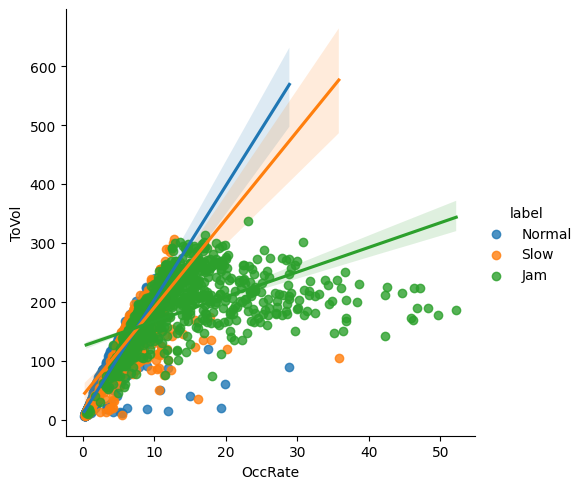

In [ ]:
sns.lmplot(x="OccRate", y="ToVol", hue="label", data=df)

In [ ]:
df[0:288]

Date  ToVol  SmVol  MeVol  LaVol  Speed  OccRate  \
0     2017-04-03 0:00     30     21      9      0   58.6     1.09   
1     2017-04-03 0:05     28     17     11      0   57.5     1.29   
2     2017-04-03 0:10     42     33      8      1   53.1     1.53   
3     2017-04-03 0:15     32     22      9      1   56.2     1.25   
4     2017-04-03 0:20     22     15      7      0   52.8     1.02   
..                ...    ...    ...    ...    ...    ...      ...   
283  2017-04-03 23:35     51     39     12      0   50.4     2.12   
284  2017-04-03 23:40     53     38     15      0   54.3     2.05   
285  2017-04-03 23:45     19     13      6      0   52.5     0.95   
286  2017-04-03 23:50     26     18      8      0   55.4     1.13   
287  2017-04-03 23:55     38     26     12      0   55.1     1.63   

               new_Date      time  hour  day day_name  weekday   label  
0   2017-04-03 00:00:00  00:00:00     0    3   Monday        0  Normal  
1   2017-04-03 00:05:00  00:05:00     0    3   Monday        0  Normal  
2   2017-04-03 00:10:00  00:10:00     0    3   Monday        0  Normal  
3   2017-04-03 00:15:00  00:15:00     0    3   Monday        0  Normal  
4   2017-04-03 00:20:00  00:20:00     0    3   Monday        0  Normal  
..                  ...       ...   ...  ...      ...      ...     ...  
283 2017-04-03 23:35:00  23:35:00    23    3   Monday        0  Normal  
284 2017-04-03 23:40:00  23:40:00    23    3   Monday        0  Normal  
285 2017-04-03 23:45:00  23:45:00    23    3   Monday        0  Normal  
286 2017-04-03 23:50:00  23:50:00    23    3   Monday        0  Normal  
287 2017-04-03 23:55:00  23:55:00    23    3   Monday        0  Normal  

[288 rows x 14 columns]

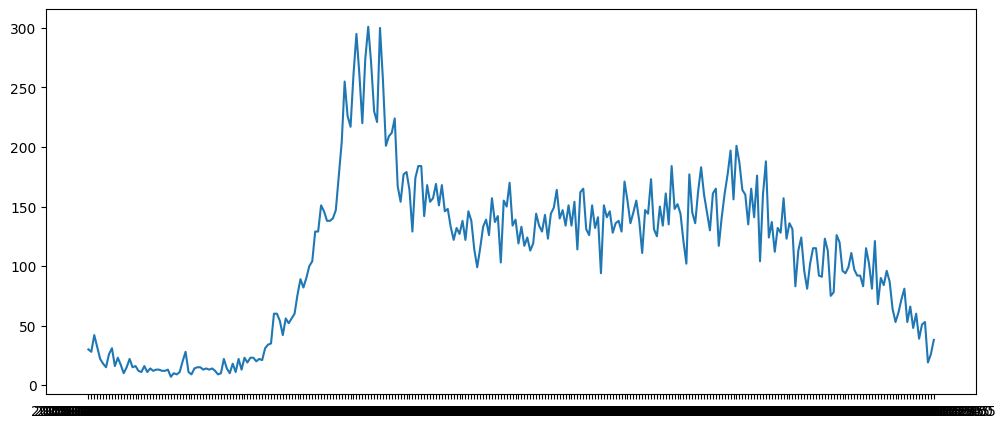

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"][0:288], df["ToVol"][0:288], label="ToVol")

# Ïã§Ïäµ2

github.com/cokemhlee/FireFighting-BigDataAnalysis

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('/content/Pandas_Excel_Sample.xlsx')
#display(data)
data.head()
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data_proceed = data.sort_values(['ÌèâÍ∑†'], ascending=[False])
display(data_proceed)

Ï†ÑÍ≥µ   Ïù¥Î¶Ñ  Íµ≠Ïñ¥  ÏòÅÏñ¥  ÏàòÌïô         ÌèâÍ∑†
4    Íµ≠Î¨∏ÌïôÍ≥º  Ïù¥Ìö®Î¶¨  95  84  85  88.000000
6    ÏòÅÎ¨∏ÌïôÍ≥º  Ïù¥ÏÉÅÏàú  80  85  90  85.000000
2  Ïª¥Ìì®ÌÑ∞Í≥µÌïôÍ≥º  ÌôçÍ∏∏Îèô  90  80  80  83.333333
5    ÏòÅÎ¨∏ÌïôÍ≥º  Ïù¥ÏÉÅÌò∏  74  90  80  81.333333
0  Ïª¥Ìì®ÌÑ∞Í≥µÌïôÍ≥º  ÍπÄÏ≤†Ïàú  70  90  70  76.666667
1  Ïª¥Ìì®ÌÑ∞Í≥µÌïôÍ≥º  Ïù¥ÏàúÏã†  80  70  80  76.666667
3    Íµ≠Î¨∏ÌïôÍ≥º  Î∞ïÌö®Ïã†  87  64  74  75.000000

In [ ]:
data_proceed = data.sort_values(['ÌèâÍ∑†'], ascending=[False])[0:3]
display(data_proceed)

Ï†ÑÍ≥µ   Ïù¥Î¶Ñ  Íµ≠Ïñ¥  ÏòÅÏñ¥  ÏàòÌïô         ÌèâÍ∑†
4    Íµ≠Î¨∏ÌïôÍ≥º  Ïù¥Ìö®Î¶¨  95  84  85  88.000000
6    ÏòÅÎ¨∏ÌïôÍ≥º  Ïù¥ÏÉÅÏàú  80  85  90  85.000000
2  Ïª¥Ìì®ÌÑ∞Í≥µÌïôÍ≥º  ÌôçÍ∏∏Îèô  90  80  80  83.333333

In [ ]:
data_proceed = data['Ïù¥Î¶Ñ']
display(data_proceed)

0    ÍπÄÏ≤†Ïàú
1    Ïù¥ÏàúÏã†
2    ÌôçÍ∏∏Îèô
3    Î∞ïÌö®Ïã†
4    Ïù¥Ìö®Î¶¨
5    Ïù¥ÏÉÅÌò∏
6    Ïù¥ÏÉÅÏàú
Name: Ïù¥Î¶Ñ, dtype: object

In [ ]:
data_proceed = data[data['Ï†ÑÍ≥µ'] == 'Íµ≠Î¨∏ÌïôÍ≥º']
display(data_proceed)
print('\n')
print(len(data_proceed.index)) # print(len(data_proceed)) Í≤∞Í≥º Í∞ôÏùå
print(data_proceed.index)

Ï†ÑÍ≥µ   Ïù¥Î¶Ñ  Íµ≠Ïñ¥  ÏòÅÏñ¥  ÏàòÌïô    ÌèâÍ∑†
3  Íµ≠Î¨∏ÌïôÍ≥º  Î∞ïÌö®Ïã†  87  64  74  75.0
4  Íµ≠Î¨∏ÌïôÍ≥º  Ïù¥Ìö®Î¶¨  95  84  85  88.0



2
Int64Index([3, 4], dtype='int64')


In [ ]:
data_proceed = data.groupby('Ï†ÑÍ≥µ').sum()
display(data_proceed)

<ipython-input-28-4a70eb7c5e4e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_proceed = data.groupby('Ï†ÑÍ≥µ').sum()


Íµ≠Ïñ¥   ÏòÅÏñ¥   ÏàòÌïô          ÌèâÍ∑†
Ï†ÑÍ≥µ                               
Íµ≠Î¨∏ÌïôÍ≥º    182  148  159  163.000000
ÏòÅÎ¨∏ÌïôÍ≥º    154  175  170  166.333333
Ïª¥Ìì®ÌÑ∞Í≥µÌïôÍ≥º  240  240  230  236.666667

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-30-fe8a2f5a9f29>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)


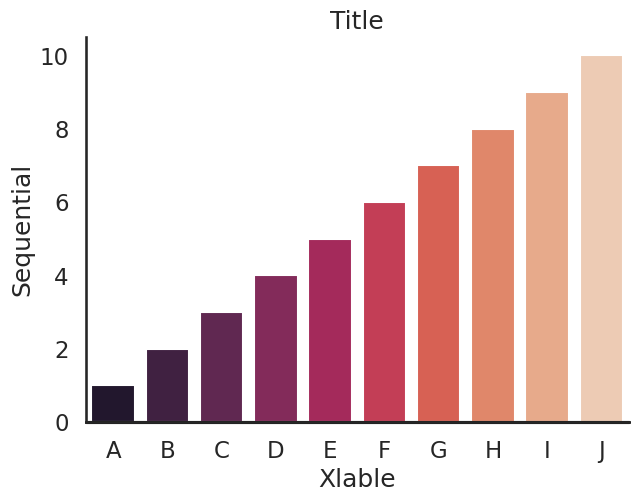

In [ ]:
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(7, 5))

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

ax1.set_xlabel("Xlable")
ax1.set_title("Title")
sns.despine()

In [ ]:
#!pip install folium
import folium

In [ ]:
map_osm = folium.Map(location=[37.322232, 126.830899])
map_osm

In [ ]:
map_osm = folium.Map(location=[37.322232, 126.830899], zoom_start=16)
map_osm


In [ ]:
map_osm = folium.Map(location=[37.322232, 126.830899], zoom_start=14, tiles='Stamen Toner')
map_osm

In [ ]:
map_osm = folium.Map(location=[37.322232, 126.830899], zoom_start=14)

folium.Marker([37.322232, 126.830899], popup='ÏïàÏÇ∞ ÏãúÏ≤≠').add_to(map_osm)
folium.Marker([37.325571, 126.816793], popup='ÌôîÎûëÏ†ÄÏàòÏßÄ',icon=folium.Icon(icon='tint')).add_to(map_osm)

map_osm
#map_osm.save('/content/gdrive/MyDrive/Python/map.html')

# Ïã§Ïäµ3 - ÍµêÌÜµÏÇ¨Í≥† Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî

In [ ]:
import pandas as pd

data = pd.read_csv('/content/ÎèÑÎ°úÍµêÌÜµÍ≥µÎã®_ÏãúÎèÑ ÏãúÍµ∞Íµ¨Î≥Ñ ÍµêÌÜµÏÇ¨Í≥† ÌÜµÍ≥Ñ_20211231.csv', encoding='euc-kr')
display(data.tail(10))

ÏãúÎèÑ  ÏãúÍµ∞Íµ¨  ÏÇ¨Í≥†Í±¥Ïàò  ÏÇ¨ÎßùÏûêÏàò  Ï§ëÏÉÅÏûêÏàò  Í≤ΩÏÉÅÏûêÏàò  Î∂ÄÏÉÅÏã†Í≥†ÏûêÏàò
219  ÎåÄÏ†Ñ   Ï§ëÍµ¨  1052    14   242  1222      44
220  ÎåÄÏ†Ñ   ÏÑúÍµ¨  2162    13   461  2494      62
221  ÎåÄÏ†Ñ  Ïú†ÏÑ±Íµ¨  1905    16   366  2442      97
222  ÎåÄÏ†Ñ  ÎåÄÎçïÍµ¨   862     6   233   983      33
223  Ïö∏ÏÇ∞   Ï§ëÍµ¨   624     8   224   565      60
224  Ïö∏ÏÇ∞   ÎÇ®Íµ¨  1193    14   342  1143     101
225  Ïö∏ÏÇ∞   ÎèôÍµ¨   467     2   151   456       3
226  Ïö∏ÏÇ∞   Î∂ÅÍµ¨   786     8   251   789     109
227  Ïö∏ÏÇ∞  Ïö∏Ï£ºÍµ∞   731    18   271   693      80
228  ÏÑ∏Ï¢Ö  ÏÑ∏Ï¢ÖÏãú   788    16   278   714      39

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  func(*arg

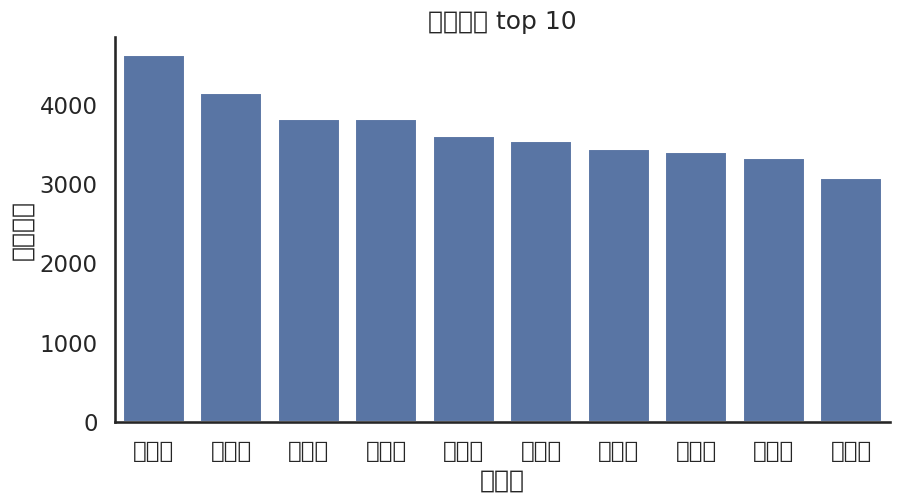

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(10, 5))

data_ac = data.sort_values(['ÏÇ¨Í≥†Í±¥Ïàò'],ascending=False)[0:10]

sns.barplot(data=data_ac,x='ÏãúÍµ∞Íµ¨',y='ÏÇ¨Í≥†Í±¥Ïàò')

ax1.set_title('ÏÇ¨Í≥†Í±¥Ïàò top 10')
sns.despine()

ÌïúÍ∏Ä Í∏ÄÏî®Ï≤¥ ÏÑ§Ïπò. ÏÑ§Ïπò ÌõÑ ÏÑ∏ÏÖò Ïû¨ÏãúÏûë ÌïÑÏöî

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and direc

# Ïã§Ïäµ4 - ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

In [ ]:
!pip install requests Beautifulsoup4

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time

In [ ]:
url_front = 'https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query=%EC%B9%B4%EB%88%88'
visitCount = 0
file = open('/content/naver-crawling.txt', 'w')

for pageIndex in range(1, 22, 10): # Ïã§Ïäµ ÏãúÍ∞ÑÏùÑ Í≥†Î†§ÌïòÏó¨ 302ÍπåÏßÄÎßå Ïã§Ìñâ (31ÌéòÏù¥ÏßÄ)
  pageUrl = '{0}{1}'.format(url_front, pageIndex)
  html = urlopen(pageUrl)
  bsObject = BeautifulSoup(html, 'html.parser')
  for link in bsObject.find_all('a', {'class':'news_tit'}):
    data = link.get('title') + '\n'
    file.write(data)

  visitCount += 1
  print('Read {0} page...'.format(visitCount))

  time.sleep(3)
file.close()
print('Î™®Îì† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏàòÏßëÎêòÏóàÏäµÎãàÎã§.')

Read 1 page...
Read 2 page...
Read 3 page...
Î™®Îì† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏàòÏßëÎêòÏóàÏäµÎãàÎã§.


In [ ]:
!pip install konlpy


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.4/19.4 MB 47.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 488.6/488.6 kB 54.8 MB/s eta 0:00:00


ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞ konlpy.Twitter

In [ ]:
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[[('‚Äò', 'Foreign'), ('Ï°∞ÏÑ†', 'Noun'), ('ÏµúÍ≥†', 'Noun'), ('ÏúÑÏßÅ', 'Noun'), ('ÎÇòÎ¨¥', 'Noun'), ('‚Äô', 'Punctuation'), ('Ï†ïÏù¥ÌíàÏÜ°', 'Noun'), ('ÏùÄ', 'Josa'), ('Ïù∏Í∞Ñ', 'Noun'), ('Ïùò', 'Josa'), ('Ìù•Îßù', 'Noun'), ('ÏùÑ', 'Josa'), ('Ïïå', 'Noun'), ('Í≥†', 'Josa'), ('ÏûàÎã§', 'Adjective'), ('\n', 'Foreign')], [("'", 'Punctuation'), ('Ï†Ñ', 'Modifier'), ('Ï≤≠Ï°∞', 'Noun'), ('ÏïÑÎãàÏóàÎÑ§', 'Adjective'), ("?'", 'Punctuation'), ('2023ÎÖÑ', 'Number'), ('Îâ¥Ïä§', 'Noun'), ('1', 'Number'), ('ÏúÑ', 'Noun'), ('Îäî', 'Josa'), ('‚Ä¶"', 'Punctuation'), ('558Ïñµ', 'Number'), ('ÌîºÌï¥', 'Noun'), ('Î∞úÏÉù', 'Noun'), ('Ìïú', 'Josa'), ('ÌÉúÌíç', 'Noun'), ('Ïπ¥Îàà', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('ÌïòÏ¢Ö', 'Noun'), ('Î™©', 'Noun'), ('Ï∞ΩÏõêÏãú', 'Noun'), ('Ï†ú', 'Noun'), ('1', 'Number'), ('Î∂ÄÏãúÏû•', 'Noun'), (',', 'Punctuation'), ('ÌÉúÌíç', 'Noun'), ("'", 'Punctuation'), ('Ïπ¥Îàà', 'Noun'), ("'", 'Punctuation'), ('Ï£ºÏöî', 'Noun'), ('ÌîºÌï¥', 'Noun'), ('ÏßÄÏó≠', 'Noun

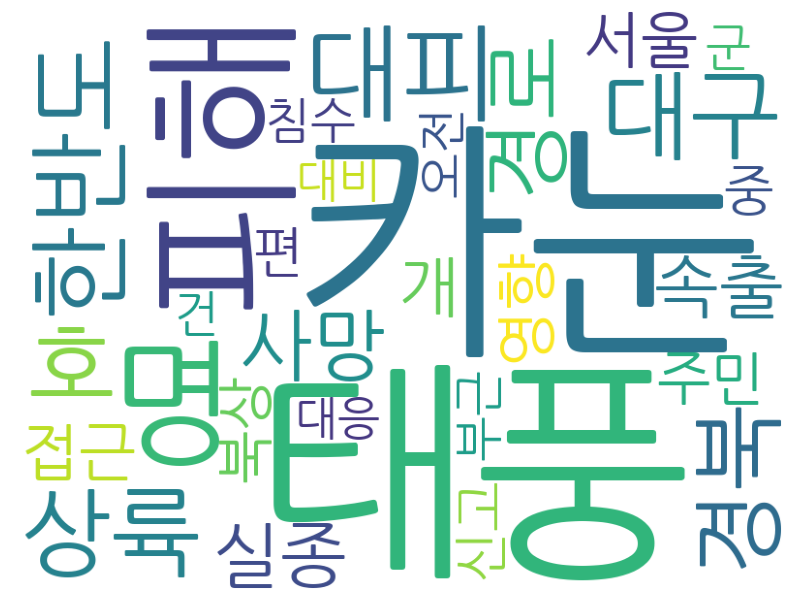

In [ ]:
# ÏàòÏßëÌïú Îç∞Ïù¥ÌÑ∞ title_list Î¶¨Ïä§Ìä∏Ïóê ÎÑ£Í∏∞
title_list = []

with open("/content/naver-crawling.txt", 'r', encoding='utf-8') as file :
    title_list = file.readlines()

# ÌòïÌÉúÏÜå Î∂ÑÏÑùÌïòÏó¨ sentences_tag Î¶¨Ïä§Ìä∏Ïóê ÎÑ£Í∏∞
twitter = Twitter()
sentences_tag = []

for sentence in title_list :
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
#    print(morph)
#    print('-'*3)

print(sentences_tag)
#print('\n'*3)

# Î™ÖÏÇ¨ÏôÄ ÌòïÏö©ÏÇ¨Îßå Íµ¨Î∂ÑÌïòÏó¨ noun_adj_list Î¶¨Ïä§Ìä∏Ïóê ÎÑ£Í∏∞
noun_adj_list = []

for sentence1 in sentences_tag :
    for word, tag in sentence1 :
        if tag in ['Noun', 'Adjective'] :
            noun_adj_list.append(word)

# ÌòïÌÉúÏÜåÎ≥Ñ Îã®Ïñ¥ Ïπ¥Ïö¥Ìä∏ Î∞è ÏÉÅÏúÑ 30Í∞ú Îã®Ïñ¥ tags Î¶¨Ïä§Ìä∏Ïóê ÎÑ£Í∏∞
counts = Counter(noun_adj_list)
tags = counts.most_common(30)
#print(tags)

# ÌïúÍ∏Ä Íπ®ÏßÄÎäî Î¨∏Ï†ú Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ Ìè∞Ìä∏ ÏÑ§Ï†ï
wc = WordCloud(font_path='/content/NanumGothic.ttf', background_color='white', width=800, height=600)

# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

# Ïã§Ïäµ5 - Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ± ÏÑúÎπÑÏä§

In [ ]:
!nvidia-smi

Thu Apr  4 05:45:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install diffusers transformers accelerate scipy safetensors

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 8.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 290.1/290.1 kB 28.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23.7/23.7 MB 40.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 823.6/823.6 kB 61.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14.1/14.1 MB 46.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]

image.save("astronaut_rides_horse.png")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

(‚Ä¶)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
!pip install translate

Í∞úÎÇòÎ¶¨ÏôÄ Î≤öÍΩÉÏù¥ ÎßåÍ∞úÌïú Ï≤†ÍµêÎ•º ÏßÄÎÇòÎäî Í∏∞Ï∞®
Train through a railway bridge full of ganari and cherry blossoms


  0%|          | 0/50 [00:00<?, ?it/s]

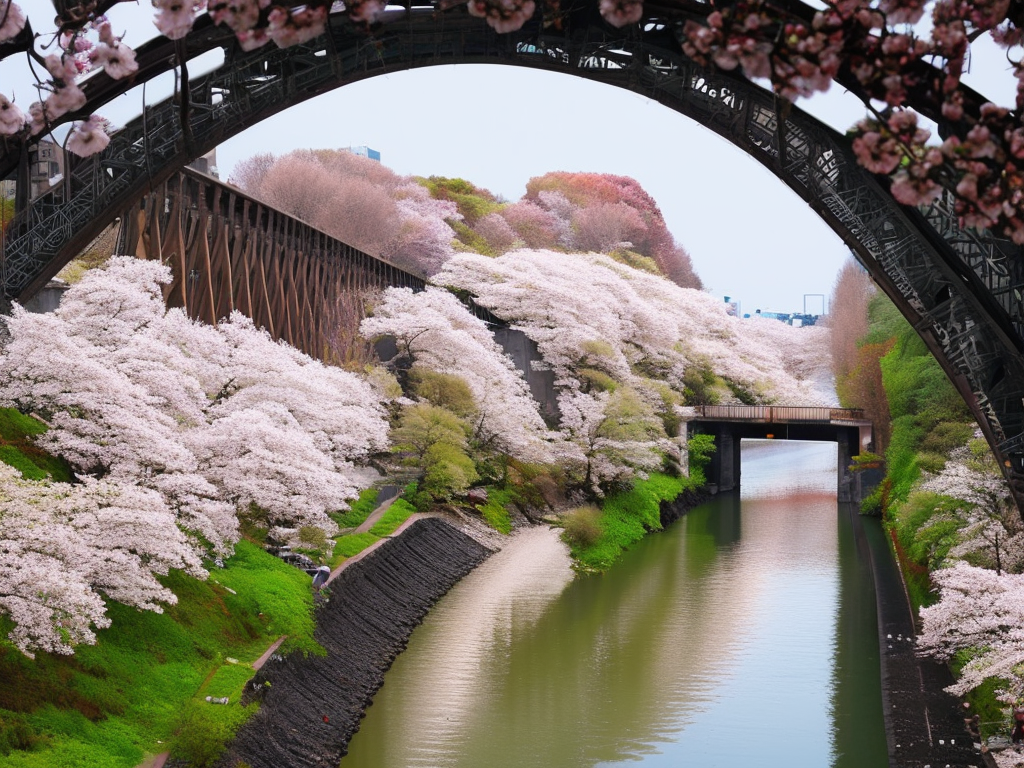

In [ ]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang="en")

def image_generator(text):
    print(text)
    translation = translator.translate(text)
    print(translation)

    image = pipe(translation, height=768, width=1024).images[0]

    return image

image_generator("ÏÜåÎ∞©Ï∞®")

In [ ]:
!pip install gradio

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.1/17.1 MB 2.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 91.9/91.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 313.4/313.4 kB 2.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 75.6/75.6 kB 2.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 144.8/144.8 kB 2.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.7/8.7 MB 2.6 MB/s eta 0:00:

In [ ]:
import gradio as gr

def inference(text):
    return image_generator(text)

demo = gr.Interface(fn=inference, inputs="text", outputs="image")

demo.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://bda6e3f2b8b0ad4a23.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


ÏÜåÎ∞©Ï∞®
Fire truck


  0%|          | 0/50 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://bda6e3f2b8b0ad4a23.gradio.live


# Ïã§Ïäµ6 - Î™®Îç∏ ÏßÅÏ†ëÎßåÎì§Í∏∞

1/1 [==============================] - 1s 820ms/step
Class: fire
Confidence Score: 1.0


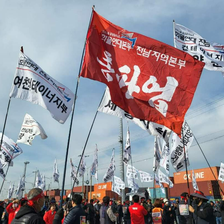

In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("/content/202211291717567682_0.jpg").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)
image


# Ïã§Ïäµ7 - ÌôîÏû¨ÌîºÌï¥Ïï° ÏòàÏ∏°

In [ ]:
# ÌïÑÏöîÌïú Î™®Îìà ÏûÑÌè¨Ìä∏
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [ ]:
# Í∏∞ÏÉÅÍ¥ÄÏ∏° ÏûêÎ£å Î°úÎî©
obs_list = pd.read_csv('/content/Í∏∞ÏÉÅÏ†ïÎ≥¥_2021.csv', encoding='euc-kr')
obs_list

FileNotFoundError: [Errno 2] No such file or directory: '/content/Í∏∞ÏÉÅÏ†ïÎ≥¥_2021.csv'

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº Î∞è ÌÉÄÏûÖ ÌôïÏù∏
obs_list.info()

NameError: name 'obs_list' is not defined

In [ ]:
# Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤Ω
obs_list.columns = ['ÏßÄÏ†ê','ÏßÄÏ†êÎ™Ö','ÏùºÏãú','ÏµúÍ≥†Í∏∞Ïò®','ÏµúÍ≥†ÌíçÏÜç']

# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÍ≤Ω
obs_list['ÏßÄÏ†ê'] = obs_list['ÏßÄÏ†ê'].astype(object)
obs_list['ÏßÄÏ†êÎ™Ö'] = obs_list['ÏßÄÏ†êÎ™Ö'].astype(object)
obs_list['ÏµúÍ≥†Í∏∞Ïò®'] = obs_list['ÏµúÍ≥†Í∏∞Ïò®'].astype(float)
obs_list['ÏµúÍ≥†ÌíçÏÜç'] = obs_list['ÏµúÍ≥†ÌíçÏÜç'].astype(float)
obs_list['ÏùºÏãú'] = pd.to_datetime(obs_list['ÏùºÏãú'], format='%Y-%m-%d')
obs_list.info()

NameError: name 'obs_list' is not defined

In [ ]:
# ÌôîÏû¨Î∞úÏÉù ÏãúÍµ∞Íµ¨ÏôÄ Îß§Ïπ≠ÌïòÍ∏∞ ÏúÑÌïòÏó¨ Í∏∞ÏÉÅÍ¥ÄÏ∏°ÏßÄÏ†êÎ™Ö Ï†ÑÏ≤¥ ÏßëÌï©(Set) ÏÉùÏÑ±
obs_branch_set = set(obs_list['ÏßÄÏ†êÎ™Ö'])
print(len(obs_branch_set))
print(obs_branch_set)

NameError: name 'obs_list' is not defined

In [ ]:
# ÏÜåÎ∞©Ï≤≠ Íµ≠Í∞ÄÌôîÏû¨Ï†ïÎ≥¥ ÏãúÎèÑÎã®ÏúÑ ÌôîÏû¨Î∞úÏÉùÌòÑÌô©Î™©Î°ù Î°úÎî©
fire_list = pd.read_csv('/content/ÌôîÏû¨Î∞úÏÉù Ï†ïÎ≥¥_2021.csv', encoding='euc-kr')
fire_list

FileNotFoundError: [Errno 2] No such file or directory: '/content/ÌôîÏû¨Î∞úÏÉù Ï†ïÎ≥¥_2021.csv'

In [ ]:
fire_list.info()

NameError: name 'fire_list' is not defined

In [ ]:
# ÌïôÏäµÏóê ÌïÑÏöîÏóÜÎäî Ïª¨Îüº Ï†úÍ±∞
fire_list.drop(['ÏÇ¨Îßù', 'Î∂ÄÏÉÅ', 'Ïù∏Î™ÖÌîºÌï¥ÏÜåÍ≥Ñ', 'ÏãúÎèÑ', 'Ïû•ÏÜåÎåÄÎ∂ÑÎ•ò', 'Î∂ÄÎèôÏÇ∞', 'ÎèôÏÇ∞', 'Ïû•ÏÜåÎåÄÎ∂ÑÎ•ò', 'Ïû•ÏÜåÏ§ëÎ∂ÑÎ•ò', 'Ïû•ÏÜåÏÜåÎ∂ÑÎ•ò'],axis=1,inplace=True)
fire_list

NameError: name 'fire_list' is not defined

In [ ]:
# Í∏∞ÏÉÅÍ¥ÄÏ∏°ÏûêÎ£åÏùò Í¥ÄÏ∏°ÏùºÏãú(Ïó∞ÏõîÏùºÎßå Ï°¥Ïû¨)ÏôÄ Îß§Ïπ≠ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÌôîÏû¨Î∞úÏÉùÎÖÑÏõîÏùº Ï§ë ÏãúÍ∞Ñ Ï†ïÎ≥¥ ÏÇ≠Ï†ú
def date_convert(x):
  split_x = x.split()
  return split_x[0]

fire_list['ÌôîÏû¨Î∞úÏÉùÎÖÑÏõîÏùº']=fire_list['ÌôîÏû¨Î∞úÏÉùÎÖÑÏõîÏùº'].apply(date_convert)
fire_list

NameError: name 'fire_list' is not defined

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÌôïÏù∏
fire_list.info()

NameError: name 'fire_list' is not defined

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò
fire_list['ÌôîÏû¨Î∞úÏÉùÎÖÑÏõîÏùº'] = pd.to_datetime(fire_list['ÌôîÏû¨Î∞úÏÉùÎÖÑÏõîÏùº'], format='%Y-%m-%d')
fire_list.info()

NameError: name 'fire_list' is not defined

In [ ]:
# Í∏∞ÏÉÅÍ¥ÄÏ∏°ÏûêÎ£åÏùò ÏßÄÏ†êÎ™ÖÍ≥º Îß§Ïπ≠ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ (ÏãúÍµ∞Íµ¨ Îì± ÌñâÏ†ïÎã®ÏúÑÍ∞Ä ÏóÜÏùå) ÌôîÏû¨Î∞úÏÉùÏûêÎ£åÏùò ÏãúÍµ∞Íµ¨ Ïª¨ÎüºÏóêÏÑú ÌñâÏ†ïÎã®ÏúÑ Ï†úÍ±∞ Î∞è Í∏∞ÏÉÅÍ¥ÄÏ∏°ÏßÄÏ†êÎ™ÖÍ≥º Îß§Ïπ≠
def trunk_region(x) :
  for region in obs_branch_set:
    if region in x:
      return region
  return np.NaN

fire_list['ÏãúÍµ∞Íµ¨'] = fire_list['ÏãúÍµ∞Íµ¨'].apply(trunk_region)
fire_list

NameError: name 'fire_list' is not defined

In [ ]:
# Îß§Ïπ≠ ÏïàÎêú ÏãúÍµ∞Íµ¨ Í∞ØÏàò ÌôïÏù∏
fire_list.isna().sum()

NameError: name 'fire_list' is not defined

In [ ]:
# Îß§Ïπ≠ ÏïàÎêú ÌôîÏû¨Î∞úÏÉù ÏûêÎ£å ÏÇ≠Ï†ú
fire_list.dropna(axis=0, inplace=True)
fire_list.isna().sum()
fire_list

NameError: name 'fire_list' is not defined

In [ ]:
# Îß§Ïπ≠Îêú ÏãúÍµ∞Íµ¨ Î∞è Í∞ØÏàò ÌôïÏù∏
print(fire_list['ÏãúÍµ∞Íµ¨'].unique())
print(fire_list['ÏãúÍµ∞Íµ¨'].nunique())

NameError: name 'fire_list' is not defined

In [ ]:
# Í∏∞ÏÉÅÍ¥ÄÏ∏°ÏûêÎ£åÏôÄ ÌôîÏû¨Î∞úÏÉùÏûêÎ£åÎ•º ÏãúÍµ∞Íµ¨ Î∞è ÌôîÏû¨Î∞úÏÉùÎÖÑÏõîÏùºÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï°∞Ïù∏
fire_obs_list = pd.merge(left = fire_list , right = obs_list, left_on = ['ÏãúÍµ∞Íµ¨','ÌôîÏû¨Î∞úÏÉùÎÖÑÏõîÏùº'], right_on = ['ÏßÄÏ†êÎ™Ö','ÏùºÏãú'], how = "inner")
fire_obs_list


NameError: name 'fire_list' is not defined

In [ ]:
# Í≤∞Ï∏°Í∞í Í∞ØÏàò ÌôïÏù∏
fire_obs_list.isna().sum()

NameError: name 'fire_obs_list' is not defined

In [ ]:
# Í≤∞Ï∏°Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú
fire_obs_list.dropna(axis=0,inplace=True)

NameError: name 'fire_obs_list' is not defined

In [ ]:
# Ï§ëÎ≥µ Ïª¨Îüº ÏÇ≠Ï†ú
fire_obs_list.drop(['ÏßÄÏ†ê','ÏßÄÏ†êÎ™Ö','ÏùºÏãú'],axis=1, inplace=True)
fire_obs_list

NameError: name 'fire_obs_list' is not defined

In [ ]:
# ÌäπÏßïÍ≥º Ï†ïÎãµ(label) Ï∂îÏ∂ú
x_data = fire_obs_list[['ÏµúÍ≥†Í∏∞Ïò®','ÏµúÍ≥†ÌíçÏÜç']]
y_data = fire_obs_list['Ïû¨ÏÇ∞ÌîºÌï¥ÏÜåÍ≥Ñ']
x_data
y_data

NameError: name 'fire_obs_list' is not defined

In [ ]:
# ÌïôÏäµÏßëÌï©Í≥º ÌÖåÏä§Ìä∏ÏßëÌï© Î∂ÑÎ¶¨ (30%)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

# Î∂ÑÎ¶¨Îêú Í∞ØÏàò ÌôïÏù∏
print(x_train.shape); print(x_test.shape); print(y_train.shape); print(y_test.shape)

NameError: name 'x_data' is not defined

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùº Ï°∞Ï†ï

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled
x_test_scaled

NameError: name 'x_train' is not defined

In [ ]:
# Î™®Îç∏ Ï†ïÏùòÎ•º ÏúÑÌïú Î™®Îìà ÏûÑÌè¨Ìä∏
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# ÌÖêÏÑúÌîåÎ°úÏö∞ ÌïôÏäµÎç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
#train_dataset = tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train.values))
#test_dataset = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test.values))
#train_dataset = train_dataset.shuffle(len(train_dataset)).batch(1)

In [ ]:
# ÌôîÏû¨ Î∞úÏÉù Í±¥Ïàò ÏòàÏ∏° Î™®Îç∏ Ï†ïÏùò (ÏßÄÏó≠Î≥Ñ ÏµúÍ≥† Í∏∞Ïò®, ÏµúÎåÄ ÌíçÏÜçÏùÑ ÏûÖÎ†• ÌäπÏßïÏúºÎ°ú ÌïòÍ≥† ÌôîÏû¨ Î∞úÏÉù ÌîºÌï¥Ïï° ÏòàÏ∏°)

model = Sequential()

model.add(Dense(16,activation='relu',input_dim=2))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear')) #as this is Regression problem

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Î™®Îç∏ ÌïôÏäµ
model.compile(loss='MeanAbsoluteError', optimizer='Adam')
hist = model.fit(x_train_scaled, y_train.values,validation_data=(x_test_scaled, y_test.values),epochs=10)

NameError: name 'x_train_scaled' is not defined

In [ ]:
# ÌïôÏäµÍ≥ºÏ†ï Í∞ÄÏãúÌôî
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.show()

NameError: name 'hist' is not defined

In [ ]:
# Î™®Îç∏ ÌèâÍ∞Ä
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test.values))
test_dataset = test_dataset.shuffle(len(test_dataset)).batch(1)
results = model.evaluate(test_dataset)
print(f"test loss: {results}")

NameError: name 'x_test_scaled' is not defined

In [ ]:
# Ï∂îÎ°†
real_data = scaler.transform([[30.4,25.0]])
y_pred = model.predict(real_data)
print(y_pred)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# Ïã§Ïäµ8 - ÎØºÏõêÍ≤åÏãúÌåê ÌÅ¨Î°§ÎßÅ

In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification", model="matthewburke/korean_sentiment")
custom_tweet = "ÏòÅÌôî Ïû¨Î∞åÎã§."
preds = classifier(custom_tweet, return_all_scores=True)
is_positive = preds[0][1]['score'] > 0.5


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/887 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/396k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/788k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
print(is_positive)

True


In [ ]:
import pandas as pd

df = pd.read_excel('/content/Í≤ΩÏ∞∞Ï≤≠ ÎØºÏõêÍ≤åÏãúÌåê.xlsx')
df

ÏàúÎ≤à                                             Ï†úÎ™©_URL  \
0   16395  https://www.police.go.kr/user/bbs/BD_selectBbs...   
1   16394  https://www.police.go.kr/user/bbs/BD_selectBbs...   
2   16393  https://www.police.go.kr/user/bbs/BD_selectBbs...   
3   16392  https://www.police.go.kr/user/bbs/BD_selectBbs...   
4   16391  https://www.police.go.kr/user/bbs/BD_selectBbs...   
..    ...                                                ...   
95  16300  https://www.police.go.kr/user/bbs/BD_selectBbs...   
96  16299  https://www.police.go.kr/user/bbs/BD_selectBbs...   
97  16298  https://www.police.go.kr/user/bbs/BD_selectBbs...   
98  16297  https://www.police.go.kr/user/bbs/BD_selectBbs...   
99  16296  https://www.police.go.kr/user/bbs/BD_selectBbs...   

                                           Ï†úÎ™©         Îì±Î°ùÏùº  \
0                        Ïù∏ÌÑ∞ÎÑ∑ ÏáºÌïëÎ™∞ "Ïø†Ìå°"ÏùÑ Í≥†Î∞úÌï©ÎãàÎã§!  2024-01-24   
1                  Ïù∏ÌÑ∞ÎÑ∑ ÏáºÌïëÎ™∞ AliexpressÎ•º Í≥†Î∞úÌï©ÎãàÎã§.  2024-01-24   
2                      Í≤ΩÏ∞∞Ï≤≠Ïû• ÎãòÍªò ÎìúÎ¶¨Îäî Îã§ÏÜå ÏÇ¨Ï†ÅÏù∏ ÏßàÎ¨∏.  2024-01-24   
3                           Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ  2024-01-24   
4                        ÏúÑÎßåÏ°∞ÏÑ† V2kÏùò Í∞úÏöî Î∞è Ï§ëÍ∞ÑÎ≥¥Í≥†.  2024-01-24   
..                                        ...         ...   
95                 Ïù∏ÌÑ∞ÎÑ∑ ÏáºÌïëÎ™∞ AliexpressÎ•º Í≥†Î∞úÌï©ÎãàÎã§.  2024-01-22   
96                     Í≤ΩÏ∞∞Ï≤≠Ïû• ÎãòÍªò ÎìúÎ¶¨Îäî Îã§ÏÜå ÏÇ¨Ï†ÅÏù∏ ÏßàÎ¨∏.  2024-01-22   
97                          Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ  2024-01-22   
98                       ÏúÑÎßåÏ°∞ÏÑ† V2kÏùò Í∞úÏöî Î∞è Ï§ëÍ∞ÑÎ≥¥Í≥†.  2024-01-22   
99  Î∂àÎ≤ïÌï¥ÌÇπÍ≥º ÏÇ¨Ï∞∞ Í≥µÏûëÏùÑ ÏùºÏÇºÎäî Í≤ΩÏ∞∞Ïùò ÎßùÎÇòÎãàÎì§ÏóêÍ≤å Ï†ÑÌïòÎäî Í≤ΩÍ≥† Î©îÏÑ∏ÏßÄÏûÖÎãàÎã§  2024-01-22   

                                                 Text  
0   ÏßÄÎÇú 1Ïõî 3Ïùº Ïø†Ìå°ÏóêÏÑú Ìò∏Ïã†Ïö© Î≥¥ÏïàÏö©ÌíàÏù∏ ÏÇºÎã®Î¥âÏùÑ Íµ¨Îß§ÌïòÏòÄÏäµÎãàÎã§. Íµ¨Îß§ÎãπÏãúÎ∂ÄÌÑ∞ Ìåê...  
1   Î≥∏Ïù∏ÏùÄ ÏßÄÎÇú 10ÏõîÏóê Ïù∏ÌÑ∞ÎÑ∑ ÏáºÌïëÎ™∞ aliexpressÎ•º ÌÜµÌï¥ÏÑú 4Í∞ÄÏßÄÏùò ÌîºÍ∑úÏñ¥ Ï†ú...  
2   Ïñ¥Îäê Ï¥åÏû•Ïùò Í≥†ÎØº?(Î™©ÏûêÏùò Í≥†ÎØº)\nÏñ¥Îäê ÎßàÏùÑ Ïñ¥Í∑ÄÏóê Îß§Ïö∞ ÌÅ¨Í≥† ÏïÑÎ¶ÑÎã§Ïö¥ Ìïú Í∑∏Î£®Ïùò...  
3   Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„ÄÇ? V2k„ÅØ...  
4   V2kÏùò Í∞úÏöî. V2kÎäî Í∞úÏù∏ÏÇ¨Ï∞∞ Í≥µÏûëÏ§ëÏóê ÌïòÎÇòÎ°ú Ï†ÑÌååÍ≥µÏûëÏùÑ ÎßêÌï©ÎãàÎã§. Ï†ïÎ≥¥Í∏∞Í¥ÄÏùò ...  
..                                                ...  
95  Î≥∏Ïù∏ÏùÄ ÏßÄÎÇú 10ÏõîÏóê Ïù∏ÌÑ∞ÎÑ∑ ÏáºÌïëÎ™∞ aliexpressÎ•º ÌÜµÌï¥ÏÑú 4Í∞ÄÏßÄÏùò ÌîºÍ∑úÏñ¥ Ï†ú...  
96  Ïñ¥Îäê Ï¥åÏû•Ïùò Í≥†ÎØº?(Î™©ÏûêÏùò Í≥†ÎØº)\nÏñ¥Îäê ÎßàÏùÑ Ïñ¥Í∑ÄÏóê Îß§Ïö∞ ÌÅ¨Í≥† ÏïÑÎ¶ÑÎã§Ïö¥ Ìïú Í∑∏Î£®Ïùò...  
97  Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„ÄÇ? V2k„ÅØ...  
98  V2kÏùò Í∞úÏöî. V2kÎäî Í∞úÏù∏ÏÇ¨Ï∞∞ Í≥µÏûëÏ§ëÏóê ÌïòÎÇòÎ°ú Ï†ÑÌååÍ≥µÏûëÏùÑ ÎßêÌï©ÎãàÎã§. Ï†ïÎ≥¥Í∏∞Í¥ÄÏùò ...  
99  Î¨¥Î∂ÑÎ≥ÑÌïú Î∂àÎ≤ïÌï¥ÌÇπÍ≥º ÏÇ¨Ï∞∞Í≥µÏûëÏùÄ Íµ≠Í∞ÄÏóê ÎåÄÌïú Î∞òÏó≠ÌñâÏúÑÏûÑÏùÑ ÏïåÎ†§ÎìúÎ¶¨Î©∞ Í≤ΩÍ≥†Ìï©ÎãàÎã§. ÎãπÏã†...  

[100 rows x 5 columns]

In [ ]:
def sentiment(text):
    preds = classifier(text[:512],return_all_scores=True)
    print(preds)
    if (preds[0][1]['score'] > 0.5):
        return 'Í∏çÏ†ï'
    else:
        return 'Î∂ÄÏ†ï'

In [ ]:
sentiment(df.loc[0,'Text'])

[[{'label': 'LABEL_0', 'score': 0.9028083682060242}, {'label': 'LABEL_1', 'score': 0.09719166159629822}]]


'Î∂ÄÏ†ï'

In [ ]:
df['Sentiment'] = df['Text'].apply(sentiment)
df

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'LABEL_0', 'score': 0.9028083682060242}, {'label': 'LABEL_1', 'score': 0.09719166159629822}]]
[[{'label': 'LABEL_0', 'score': 0.8867743015289307}, {'label': 'LABEL_1', 'score': 0.11322570592164993}]]
[[{'label': 'LABEL_0', 'score': 0.6162126660346985}, {'label': 'LABEL_1', 'score': 0.38378727436065674}]]
[[{'label': 'LABEL_0', 'score': 0.30722174048423767}, {'label': 'LABEL_1', 'score': 0.6927782297134399}]]
[[{'label': 'LABEL_0', 'score': 0.7950368523597717}, {'label': 'LABEL_1', 'score': 0.20496311783790588}]]
[[{'label': 'LABEL_0', 'score': 0.8745097517967224}, {'label': 'LABEL_1', 'score': 0.1254902184009552}]]
[[{'label': 'LABEL_0', 'score': 0.7599110007286072}, {'label': 'LABEL_1', 'score': 0.24008898437023163}]]
[[{'label': 'LABEL_0', 'score': 0.726939857006073}, {'label': 'LABEL_1', 'score': 0.2730601727962494}]]
[[{'label': 'LABEL_0', 'score': 0.8534290194511414}, {'label': 'LABEL_1', 'score': 0.14657096564769745}]]
[[{'label': 'LABEL_0', 'score': 0.853429019451141

ÏàúÎ≤à                                             Ï†úÎ™©_URL  \
0   16395  https://www.police.go.kr/user/bbs/BD_selectBbs...   
1   16394  https://www.police.go.kr/user/bbs/BD_selectBbs...   
2   16393  https://www.police.go.kr/user/bbs/BD_selectBbs...   
3   16392  https://www.police.go.kr/user/bbs/BD_selectBbs...   
4   16391  https://www.police.go.kr/user/bbs/BD_selectBbs...   
..    ...                                                ...   
95  16300  https://www.police.go.kr/user/bbs/BD_selectBbs...   
96  16299  https://www.police.go.kr/user/bbs/BD_selectBbs...   
97  16298  https://www.police.go.kr/user/bbs/BD_selectBbs...   
98  16297  https://www.police.go.kr/user/bbs/BD_selectBbs...   
99  16296  https://www.police.go.kr/user/bbs/BD_selectBbs...   

                                           Ï†úÎ™©         Îì±Î°ùÏùº  \
0                        Ïù∏ÌÑ∞ÎÑ∑ ÏáºÌïëÎ™∞ "Ïø†Ìå°"ÏùÑ Í≥†Î∞úÌï©ÎãàÎã§!  2024-01-24   
1                  Ïù∏ÌÑ∞ÎÑ∑ ÏáºÌïëÎ™∞ AliexpressÎ•º Í≥†Î∞úÌï©ÎãàÎã§.  2024-01-24   
2                      Í≤ΩÏ∞∞Ï≤≠Ïû• ÎãòÍªò ÎìúÎ¶¨Îäî Îã§ÏÜå ÏÇ¨Ï†ÅÏù∏ ÏßàÎ¨∏.  2024-01-24   
3                           Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ  2024-01-24   
4                        ÏúÑÎßåÏ°∞ÏÑ† V2kÏùò Í∞úÏöî Î∞è Ï§ëÍ∞ÑÎ≥¥Í≥†.  2024-01-24   
..                                        ...         ...   
95                 Ïù∏ÌÑ∞ÎÑ∑ ÏáºÌïëÎ™∞ AliexpressÎ•º Í≥†Î∞úÌï©ÎãàÎã§.  2024-01-22   
96                     Í≤ΩÏ∞∞Ï≤≠Ïû• ÎãòÍªò ÎìúÎ¶¨Îäî Îã§ÏÜå ÏÇ¨Ï†ÅÏù∏ ÏßàÎ¨∏.  2024-01-22   
97                          Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ  2024-01-22   
98                       ÏúÑÎßåÏ°∞ÏÑ† V2kÏùò Í∞úÏöî Î∞è Ï§ëÍ∞ÑÎ≥¥Í≥†.  2024-01-22   
99  Î∂àÎ≤ïÌï¥ÌÇπÍ≥º ÏÇ¨Ï∞∞ Í≥µÏûëÏùÑ ÏùºÏÇºÎäî Í≤ΩÏ∞∞Ïùò ÎßùÎÇòÎãàÎì§ÏóêÍ≤å Ï†ÑÌïòÎäî Í≤ΩÍ≥† Î©îÏÑ∏ÏßÄÏûÖÎãàÎã§  2024-01-22   

                                                 Text Sentiment  
0   ÏßÄÎÇú 1Ïõî 3Ïùº Ïø†Ìå°ÏóêÏÑú Ìò∏Ïã†Ïö© Î≥¥ÏïàÏö©ÌíàÏù∏ ÏÇºÎã®Î¥âÏùÑ Íµ¨Îß§ÌïòÏòÄÏäµÎãàÎã§. Íµ¨Îß§ÎãπÏãúÎ∂ÄÌÑ∞ Ìåê...        Î∂ÄÏ†ï  
1   Î≥∏Ïù∏ÏùÄ ÏßÄÎÇú 10ÏõîÏóê Ïù∏ÌÑ∞ÎÑ∑ ÏáºÌïëÎ™∞ aliexpressÎ•º ÌÜµÌï¥ÏÑú 4Í∞ÄÏßÄÏùò ÌîºÍ∑úÏñ¥ Ï†ú...        Î∂ÄÏ†ï  
2   Ïñ¥Îäê Ï¥åÏû•Ïùò Í≥†ÎØº?(Î™©ÏûêÏùò Í≥†ÎØº)\nÏñ¥Îäê ÎßàÏùÑ Ïñ¥Í∑ÄÏóê Îß§Ïö∞ ÌÅ¨Í≥† ÏïÑÎ¶ÑÎã§Ïö¥ Ìïú Í∑∏Î£®Ïùò...        Î∂ÄÏ†ï  
3   Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„ÄÇ? V2k„ÅØ...        Í∏çÏ†ï  
4   V2kÏùò Í∞úÏöî. V2kÎäî Í∞úÏù∏ÏÇ¨Ï∞∞ Í≥µÏûëÏ§ëÏóê ÌïòÎÇòÎ°ú Ï†ÑÌååÍ≥µÏûëÏùÑ ÎßêÌï©ÎãàÎã§. Ï†ïÎ≥¥Í∏∞Í¥ÄÏùò ...        Î∂ÄÏ†ï  
..                                                ...       ...  
95  Î≥∏Ïù∏ÏùÄ ÏßÄÎÇú 10ÏõîÏóê Ïù∏ÌÑ∞ÎÑ∑ ÏáºÌïëÎ™∞ aliexpressÎ•º ÌÜµÌï¥ÏÑú 4Í∞ÄÏßÄÏùò ÌîºÍ∑úÏñ¥ Ï†ú...        Î∂ÄÏ†ï  
96  Ïñ¥Îäê Ï¥åÏû•Ïùò Í≥†ÎØº?(Î™©ÏûêÏùò Í≥†ÎØº)\nÏñ¥Îäê ÎßàÏùÑ Ïñ¥Í∑ÄÏóê Îß§Ïö∞ ÌÅ¨Í≥† ÏïÑÎ¶ÑÎã§Ïö¥ Ìïú Í∑∏Î£®Ïùò...        Î∂ÄÏ†ï  
97  Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„ÄÇ? V2k„ÅØ...        Í∏çÏ†ï  
98  V2kÏùò Í∞úÏöî. V2kÎäî Í∞úÏù∏ÏÇ¨Ï∞∞ Í≥µÏûëÏ§ëÏóê ÌïòÎÇòÎ°ú Ï†ÑÌååÍ≥µÏûëÏùÑ ÎßêÌï©ÎãàÎã§. Ï†ïÎ≥¥Í∏∞Í¥ÄÏùò ...        Î∂ÄÏ†ï  
99  Î¨¥Î∂ÑÎ≥ÑÌïú Î∂àÎ≤ïÌï¥ÌÇπÍ≥º ÏÇ¨Ï∞∞Í≥µÏûëÏùÄ Íµ≠Í∞ÄÏóê ÎåÄÌïú Î∞òÏó≠ÌñâÏúÑÏûÑÏùÑ ÏïåÎ†§ÎìúÎ¶¨Î©∞ Í≤ΩÍ≥†Ìï©ÎãàÎã§. ÎãπÏã†...        Î∂ÄÏ†ï  

[100 rows x 6 columns]

In [ ]:
df['Sentiment'].value_counts()

Sentiment
Î∂ÄÏ†ï    89
Í∏çÏ†ï    11
Name: count, dtype: int64

In [ ]:
df[df['Sentiment']=='Í∏çÏ†ï']

ÏàúÎ≤à                                             Ï†úÎ™©_URL  \
3   16392  https://www.police.go.kr/user/bbs/BD_selectBbs...   
13  16382  https://www.police.go.kr/user/bbs/BD_selectBbs...   
19  16376  https://www.police.go.kr/user/bbs/BD_selectBbs...   
23  16372  https://www.police.go.kr/user/bbs/BD_selectBbs...   
33  16362  https://www.police.go.kr/user/bbs/BD_selectBbs...   
39  16356  https://www.police.go.kr/user/bbs/BD_selectBbs...   
41  16354  https://www.police.go.kr/user/bbs/BD_selectBbs...   
42  16353  https://www.police.go.kr/user/bbs/BD_selectBbs...   
46  16349  https://www.police.go.kr/user/bbs/BD_selectBbs...   
79  16316  https://www.police.go.kr/user/bbs/BD_selectBbs...   
97  16298  https://www.police.go.kr/user/bbs/BD_selectBbs...   

                                        Ï†úÎ™©         Îì±Î°ùÏùº  \
3                        Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ  2024-01-24   
13        Î∂ÄÏÇ∞ ÏõåÏºÄÏù¥ÏÖò Ïã†Ï≤≠Î∞©Î≤ï ÏïàÎÇ¥ (1Î∞ïÎãπ ÏàôÎ∞ïÎπÑ 5ÎßåÏõê ÏßÄÏõê)  2024-01-24   
19                        Í∞úÏù∏ÏÇ¨Î•º Ï°∞Î°±Í±∞Î¶¨Î°ú ÎßåÎì§ÏóàÏñ¥Ïò§  2024-01-23   
23                       Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ  2024-01-23   
33                           Ïä§ÎßàÌä∏ Íµ≠ÎØºÏ†úÎ≥¥ Ïï± Í∞úÏÑ†  2024-01-23   
39  ÎèÑÎ¥â,ÎÖ∏Ïõê Í≤ΩÏ∞∞ÎÖ∏Í≥†Ïóê Ï¥àÏïàÏÇ∞ Ï†ïÏÉÅ Í∞±ÎÖÑÍ∏∞Í∑πÎ≥µ ÏÇ∞ÌñâÏù¥ ÏïàÏã¨ Í∞êÏÇ¨!!!!  2024-01-23   
41                                  ÏãúÌã∞Ï¶å ÏΩîÎÇú  2024-01-23   
42                             ÍπÄÌè¨Í≤ΩÏ∞∞ÏÑúÏùò Í¥ÄÌï†Ï°∞Ï†ï  2024-01-23   
46                       Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ  2024-01-23   
79                       Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ  2024-01-22   
97                       Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ  2024-01-22   

                                                 Text Sentiment  
3   Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„ÄÇ? V2k„ÅØ...        Í∏çÏ†ï  
13  Î∞îÎã§Î°ú Ï∂úÍ∑ºÌï©ÎãàÎã§. Ïùº, Ìú¥Í∞ÄÎ•º ÎèôÏãúÏóê Ï¶êÍ∏∞Îäî "Î∂ÄÏÇ∞Ìòï ÏõåÏºÄÏù¥ÏÖò" ÏßÄÍ∏à Î¨¥Î£å Ïã†Ï≤≠Ìï¥...        Í∏çÏ†ï  
19  Ïò®ÎùºÏù∏Í≤úÏûÑÏùÑ Ï†ëÏóàÎã§Í∞Ä Ïò§Ï¶òÎã§Ïãú ÏãúÏûëÌñàÎäîÎç∞Ïöî Ï†úÍ∞Ä  Ïö∞Ïö∏Ï¶ùÏù¥ÎûëÎ∂àÏïàÏû•Ïï† Í≥µÌï≠Ïû•Ïï†Î°ú ÏïΩÏùÑ...        Í∏çÏ†ï  
23  Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„ÄÇ? V2k„ÅØ...        Í∏çÏ†ï  
33  ÏïàÎÖïÌïòÏÑ∏Ïöî. Ìï¥Ïô∏ÏÇ¥Í≥†ÏûàÏßÄÎßå ÎåÄÌïúÎØºÍµ≠ Íµ≠Ï†ÅÏùò Íµ≠ÎØºÏù¥Î©∞ ÌïúÍµ≠ÎèÑ Ï¢ÖÏ¢Ö Î∞©Î¨∏ÌïòÎäîÎç∞Ïöî,\nÌïú...        Í∏çÏ†ï  
39   ÎààÏù¥ ÎßéÏù¥ÎÇ¥Î†§ ÏÇ∞ÌñâÏ°∞Ï∞® Ïñ¥Î†§Ïö¥ ÎÇ† Í≤ΩÏ∞∞ Ï†úÎ≥µÏùÄ Ï¥àÏïàÏÇ∞ Ï†ïÏÉÅÏóêÏÑú ÎßåÎÇú Ïö∞Î¶¨Îì§Ïùò ÏïàÎèÑ ÏòÄÎã§        Í∏çÏ†ï  
41  Î≥¥Ïù¥Ïä§ ÌîºÏã± ÎãπÌï¥ÏÑú ÏãúÌã∞Ï¶å ÏΩîÎÇú Ïï± Îß§Ïùº  ÏÇ¨Ïö©ÌïòÎäî  ÏÇ¨ÎûåÏûÖÎãàÎã§.   Í≤ΩÏ∞∞Ï≤≠ ÌòëÏóÖÏù¥...        Í∏çÏ†ï  
42  Ï≤≠Ïû•Îãò ÏïàÎÖïÌïòÏÑ∏Ïöî Ï†Ñ Í≤ΩÏ∞∞Ï≤≠Ïû•ÎãòÎèÑ Í∑∏Îü¨ÏÖ®Í≥† ÏßÄÍ∏à ÍπÄÌè¨Í≤ΩÏ∞∞ÏÑúÏùò Í≤ΩÍ∏∞Î∂ÅÎ∂ÄÍ≤ΩÏ∞∞Ï≤≠ÏúºÎ°ú Í¥ÄÌï†...        Í∏çÏ†ï  
46  Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„ÄÇ? V2k„ÅØ...        Í∏çÏ†ï  
79  Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„ÄÇ? V2k„ÅØ...        Í∏çÏ†ï  
97  Ë°õÊ∞èÊúùÈÆÆ V2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„Å®‰∏≠ÈñìÂ†±Âëä„ÄÇ\nV2k„ÅÆ?Ë¶Å„ÄÇ? V2k„ÅØ...        Í∏çÏ†ï

# Ïã§Ïäµ9 - ÏÇ∞Î∂àÌÉêÏßÄ

In [1]:
! pip install -q kaggle


# Kaggle API Ìò∏Ï∂úÏùÑ ÏúÑÌïú API Key ÏóÖÎ°úÎìú
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list


# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú Î∞è ÏïïÏ∂ïÌíÄÍ∏∞

! kaggle datasets download -d phylake1337/fire-dataset
! unzip fire-dataset.zip




Saving kaggle.json to kaggle.json
ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          18903        376  0.9411765        
sahirmaharajj/electric-vehicle-population-size-2024         Electric Vehicle Population by Country (2024)  275KB  2024-03-30 19:16:06            987         29  1.0              
mexwell/drug-consumption-classification                     üíä Drug Consumption Classification               56KB  2024-03-28 15:02:22           1518         33  1.0              
bhavikjikadara/student-study-performance                    Student 

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.preprocessing import image

sns.set_style('darkgrid')

In [10]:
# Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÎßåÎì§Í∏∞ (ÌååÏùº ÏúÑÏπò, Î†àÏù¥Î∏î)

import pandas as pd
import os

# Îπà Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df = pd.DataFrame(columns=['path','label'])
type(df)

pandas.core.frame.DataFrame

In [15]:
# fire Ïù¥ÎØ∏ÏßÄÏôÄ Î†àÏù¥Î∏î 'fire'
for dirname, _, filenames in os.walk('/content/fire_dataset/fire_images'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        tmp = pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label'])
        print(tmp)
        df = df.append(tmp)
        #df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))

# non-fire Ïù¥ÎØ∏ÏßÄÏôÄ Î†àÏù¥Î∏î 'non_file'
for dirname, _, filenames in os.walk('/content/fire_dataset/non_fire_images'):
    for filename in filenames:
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'non_fire']],columns=['path','label']))
        #print(os.path.join(dirname, filename))

# ÌïôÏäµÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ ÏÑûÍ∏∞
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

                                            path label
0  /content/fire_dataset/fire_images/fire.17.png  fire


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
import seaborn as sns
sns.countplot(data=df, x='label', order=['fire','non_fire'])


# fire Ïù¥ÎØ∏ÏßÄ ÏÉòÌîå ÌôïÏù∏
import matplotlib.pyplot as plt

label = 'fire'
data = df[df['label'] == label]
#sns.set_style('dark')

pics = 6 # ÏÉòÌîå Í∞ØÏàò
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
# non-fire Ïù¥ÎØ∏ÏßÄ ÏÉòÌîå ÌôïÏù∏

label = 'non_fire'
data = df[df['label'] == label]
#sns.set_style('dark')

pics = 6 # ÏÉòÌîå Í∞ØÏàò
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï (Augmentation)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.2,
)

In [ ]:
# ÌïôÏäµ ÏßëÌï©Í≥º Í≤ÄÏ¶ù ÏßëÌï© ÏÉùÏÑ±
# ImageDataGeneratorÍ∞Ä ÏûêÎèôÏúºÎ°ú Î†àÏù¥Î∏îÏùÑ Ïù∏ÏΩîÎî©
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='training')
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='validation')


In [ ]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key

print(class_indices)

In [ ]:
# ImageDataGeneratorÍ∞Ä ÏÉùÏÑ±Ìïú Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏

pics = 6 # ÏÉòÌîå Í∞ØÏàò
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Generated images in training set')
ax = ax.ravel()
for i in range((pics//2)*2):
    ax[i].imshow(train_gen[0][0][i])
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [ ]:
# Î™®Îç∏ Ï†ïÏùò

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (2,2),activation='relu',input_shape = (256,256,3)))  #Ïôú 3ÏùºÍπåÏöî?
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid')) #Ïôú sigmoidÏùºÍπåÏöî?

# Ïïû Î∂ÄÎ∂ÑÏóêÎäî ÎÖ∏Ïù¥Ï¶àÍ∞Ä ÎßéÏúºÎØÄÎ°ú Ï†ÅÏùÄ ÌïÑÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÍ≥† ÍπäÏùÄ Ï∏µÏúºÎ°ú Í∞àÏàòÎ°ù Îçî ÎßéÏùÄ ÌäπÏßïÏùÑ Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÌÑ∞ ÏàòÎ•º ÎäòÏûÖÎãàÎã§.


In [ ]:
# Î™®Îç∏ Íµ¨Ï°∞ ÏöîÏïΩ

model.summary()


# Î™®Îç∏ Ïª¥ÌååÏùº

from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Recall(),AUC()]) # Ïôú binary_crossentrophy ÏùºÍπåÏöî?  # Ïôú RecallÏù¥ Ï§ëÏöîÌï†ÍπåÏöî?


In [ ]:
# Ï°∞Í∏∞Ï¢ÖÎ£å Ï†ÅÏö©

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stoppping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)


In [ ]:
class_weight={0:0.3, 1:1.}

In [ ]:
# ÌïôÏäµ
model.fit(x=train_gen,batch_size=32,epochs=5,validation_data=val_gen,callbacks=[early_stoppping], class_weight=class_weight)


In [ ]:
# ÌïôÏäµ Í∑∏ÎûòÌîÑ Î≥¥Í∏∞

history= model.history.history
px.line(history,title = "Metrics Plot")


# Î™®Îç∏ ÌèâÍ∞Ä
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

# ÏûòÌïú Í≤ÉÏùºÍπåÏöî?

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout


# ÏÇ¨Ï†ÑÌïôÏäµ Î™®Îç∏ Îã§Ïö¥Î°úÎìú Î∞è ÏÇ∞Î∂àÌôîÏû¨ÌÉêÏßÄ Î™®Îç∏ Ï†ïÏùò
xception = Xception(include_top = False,input_shape = (256,256,3))
input_to_model = xception.input
#turn off training
xception.trainable = False

x = Flatten()(xception.output)
x = Dense(64,activation = 'relu')(x)
output_to_model = Dense(1,activation = 'sigmoid')(x)
model2 = Model(inputs = input_to_model,outputs = output_to_model)

In [ ]:
model2.summary()


# Î™®Îç∏ Ïª¥ÌååÏùº

model2.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy',Recall(),AUC()])


# ÌïôÏäµ
history2 = model2.fit(x = train_gen,batch_size=32,epochs=5,callbacks = [early_stoppping],validation_data = val_gen, class_weight=class_weight)


In [ ]:
# ÌïôÏäµ Í∑∏ÎûòÌîÑ Î≥¥Í∏∞

history= model2.history.history
px.line(history,title='Metrics Plot')

In [ ]:
# Î™®Îç∏ ÌèâÍ∞Ä

eval_list = model2.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")


In [ ]:
# Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú
#!curl https://static01.nyt.com/images/2021/02/19/world/19storm-briefing-texas-fire/19storm-briefing-texas-fire-articleLarge.jpg --output predict.jpg
#!curl https://transcode-v2.app.engoo.com/image/fetch/f_auto,c_limit,w_1280,h_800,dpr_2/https://assets.app.engoo.com/images/6b7V4hOYczy7ODsXQtkVAg.jpeg --output predict.jpg
!curl https://img.seoul.co.kr/img/upload/2020/07/01/SSI_20200701210037.jpg --output predict.jpg


# Îã§Ïö¥Î°úÎìú Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
img = image.load_img('predict.jpg')
img


# Ïù¥ÎØ∏ÏßÄÎ•º Î™®Îç∏Ïóê ÏûÖÎ†•ÌòïÌÉúÎ°ú Î≥ÄÌôò

img = image.img_to_array(img)/255
img = tf.image.resize(img,(256,256))
img = tf.expand_dims(img,axis=0)

print("Image Shape",img.shape)


# ÏòàÏ∏° Î∞è Í≤∞Í≥º ÌôïÏù∏
prediction = int(tf.round(model.predict(x=img)).numpy()[0][0])
print("The predicted value is: ",prediction,"and the predicted label is:",class_indices[prediction])